# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [43]:
import math
import sys

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [45]:
# YOUR CODE HERE
df = pd.read_csv("wine_quality_red.tsv.gz", sep="\t")
df = df.dropna()
df.sample(10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [46]:
# YOUR CODE HERE
list(df.columns)

#fixed acidity - the starting acidity level of the wine
#volatile acidity - evaporative acids
#citric acid - amount of citrus contained in each wine
#residual sugar - remaining sugar post fermentation
#chlorides - salt content 
#free sulfur dioxide - unbound sulfur
#total sulfur dioxide - total bound and unbound sulfur
#density - heaviness of the wine
#pH - acidic level of the wine
#sulphates - wine preservatives
#alcohol - alcohol percentage in the wine
#target - quality score of the wine

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

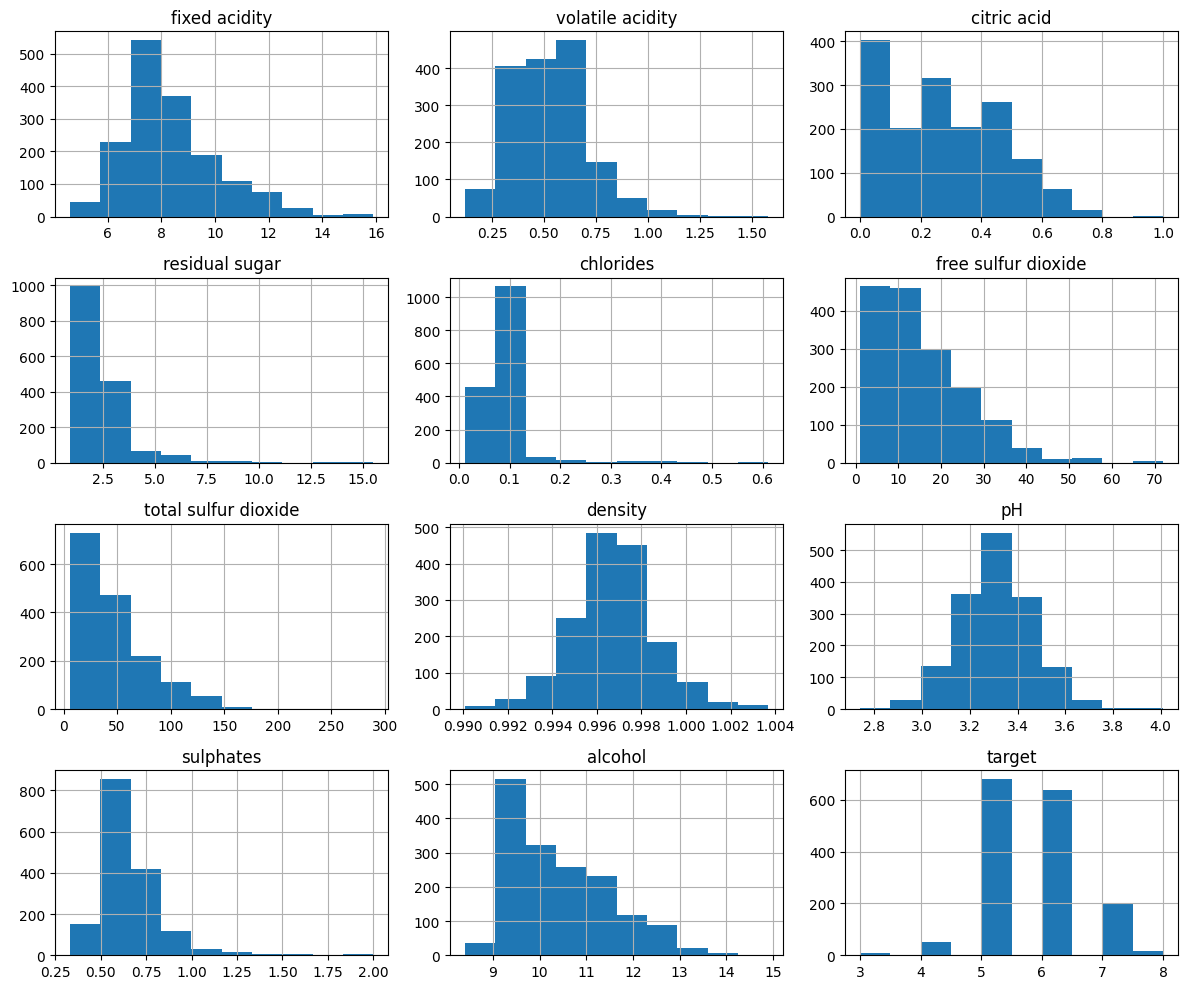

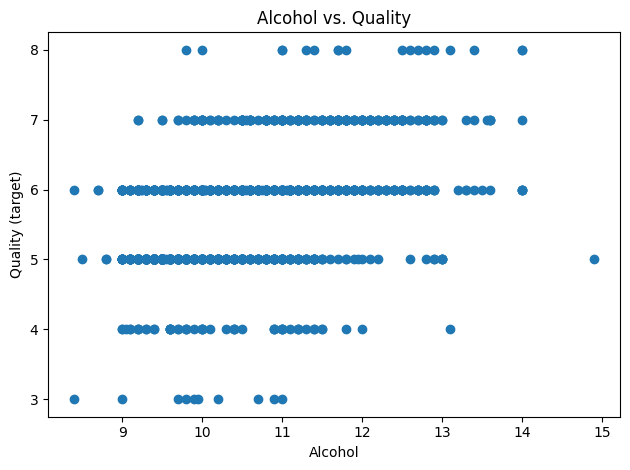

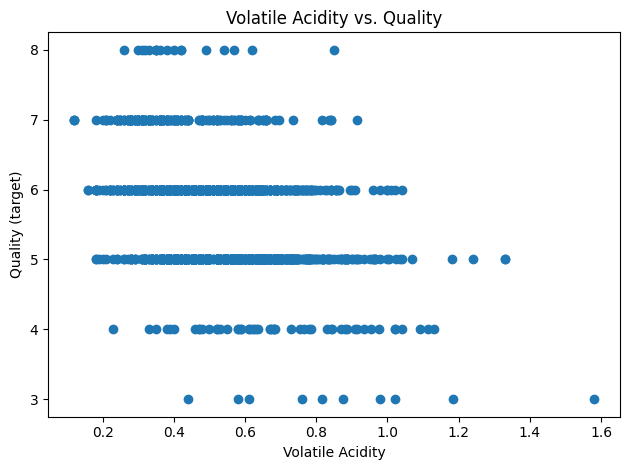

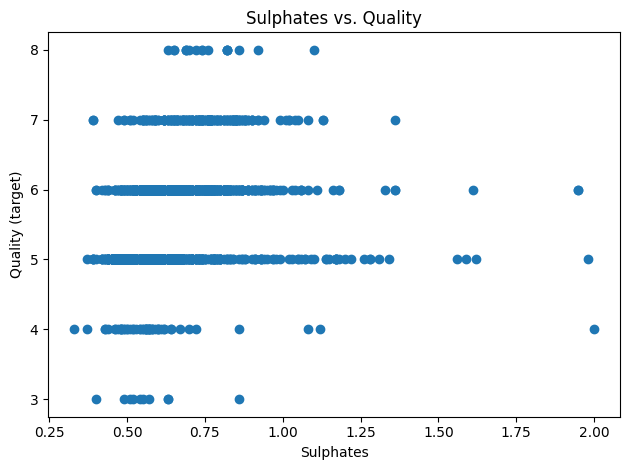

In [47]:
# YOUR CODE HERE
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df["alcohol"], df["target"])
plt.xlabel("Alcohol")
plt.ylabel("Quality (target)")
plt.title("Alcohol vs. Quality")
plt.tight_layout()
plt.show()
# This chart showed a clear trend that wines with higher alcohol content tend to receive higher quality scores.  Alcohol appears to be one of the strongest predictors of wine quality, and the positive relationship is noticeable even with some natural variation among samples.  

plt.figure()
plt.scatter(df["volatile acidity"], df["target"])
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality (target)")
plt.title("Volatile Acidity vs. Quality")
plt.tight_layout()
plt.show()
# I found this plot interesting because it showed the opposite pattern from alcohol.  Wines with higher volatile acidity generally had lower quality scores.  Since volatile acidity can create vinegar-like aromas, this negative correlation makes sense and suggest it plays an important role in determining wine quality.

plt.figure()
plt.scatter(df["sulphates"], df["target"])
plt.xlabel("Sulphates")
plt.ylabel("Quality (target)")
plt.title("Sulphates vs. Quality")
plt.tight_layout()
plt.show()
# This chart showed that higher sulphate levels are often associated with slightly higher quality.  Sulphates are used as preservatives, and they can also contribute to taste and structure.  While the relationship is not perfectly linear, the upward trend suggests sulphates may help predict quality.  

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

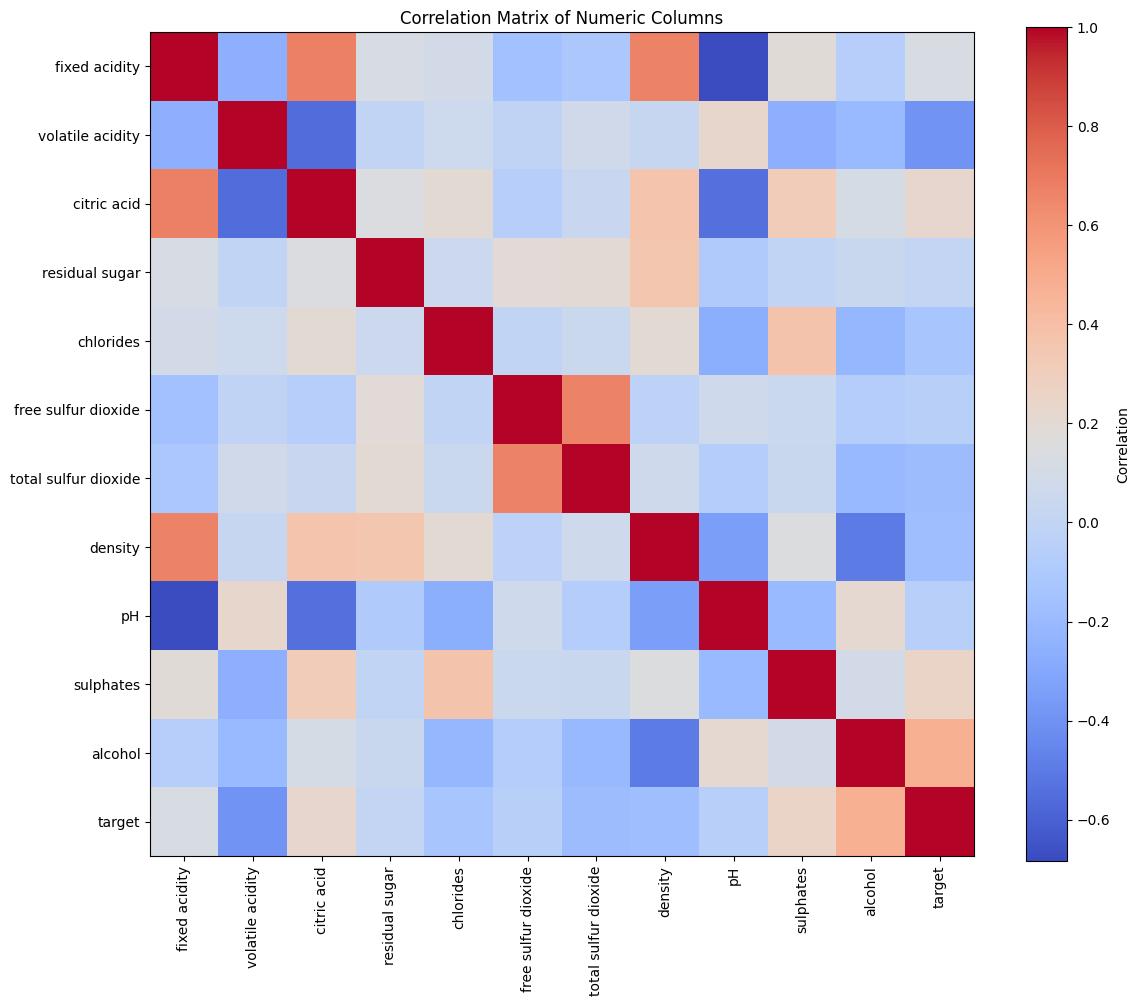


Correlations with fixed acidity:
fixed acidity           1.000000
volatile acidity       -0.256131
citric acid             0.671703
residual sugar          0.114777
chlorides               0.093705
free sulfur dioxide    -0.153794
total sulfur dioxide   -0.113181
density                 0.668047
pH                     -0.682978
sulphates               0.183006
alcohol                -0.061668
target                  0.124052
Name: fixed acidity, dtype: float64

Correlations with volatile acidity:
fixed acidity          -0.256131
volatile acidity        1.000000
citric acid            -0.552496
residual sugar          0.001918
chlorides               0.061298
free sulfur dioxide    -0.010504
total sulfur dioxide    0.076470
density                 0.022026
pH                      0.234937
sulphates              -0.260987
alcohol                -0.202288
target                 -0.390558
Name: volatile acidity, dtype: float64

Correlations with citric acid:
fixed acidity           0.6717

In [48]:
# YOUR CODE HERE
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Numeric Columns")
plt.tight_layout()
plt.show()

for col in df.columns:
    print(f"\nCorrelations with {col}:")
    print(df.corr(numeric_only=True)[col])


# The two most strongly correlated columns are fixed acidity and pH (-0.683)


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [49]:
# YOUR CODE HERE
#1) Linear regression
#Scikit-learn:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#External web:
#https://en.wikipedia.org/wiki/Linear_regression

# I chose this as this is the simplest regression model and serves as a good baseline.  It fits a straight line through the data to predict the target variable.

#2) Ridge Regression
#Scikit-learn:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#External web:
#https://en.wikipedia.org/wiki/Tikhonov_regularization

# I've chosen this as Ridge regression adds regularization to reduce overfitting and handle correlated features.  I believe this would be useful for this wine dataset.

#3) Random forest regressor
#Scikit-learn:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#External web:
#https://en.wikipedia.org/wiki/Random_forest

# This is a nonlinear model that uses many decision trees.  This can capture complex relationship and often performs better than linear models on real-world data.

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression: L2 = 0.416767, L1 = 0.500490
Ridge Regression (alpha=1.0): L2 = 0.417466, L1 = 0.501232
Lasso Regression (alpha=0.01): L2 = 0.430756, L1 = 0.510045


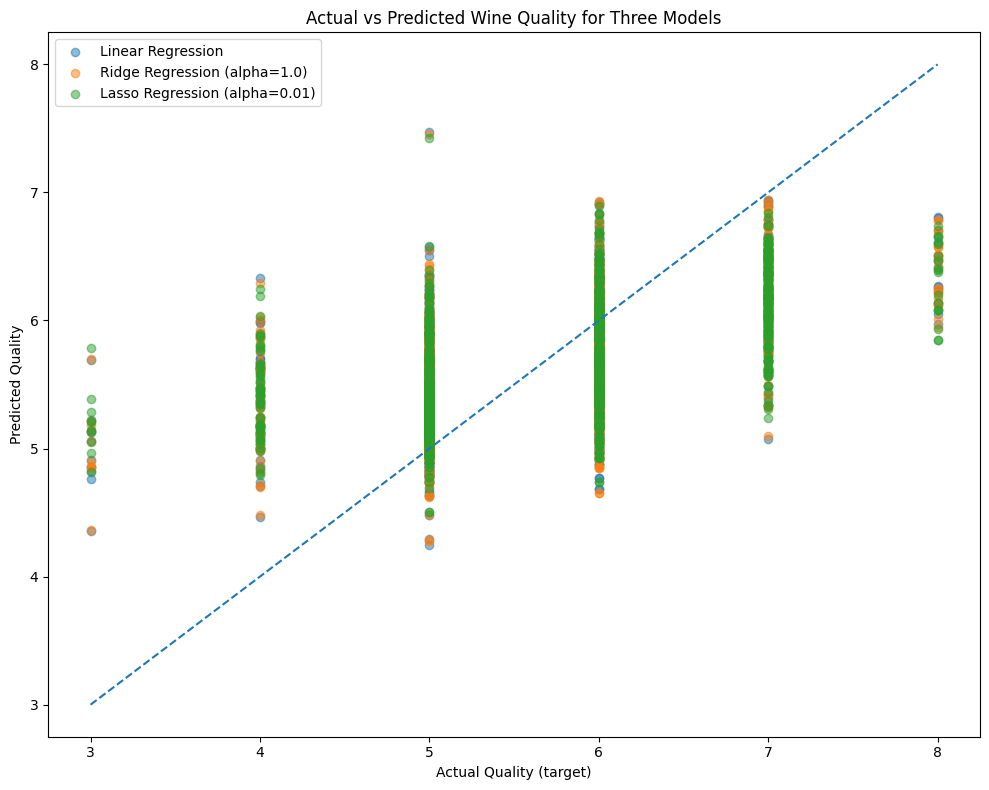

In [50]:
# YOUR CODE HERE
X = df.drop(columns=["target"])
y = df["target"]
y_np = y.to_numpy()

from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression (alpha=1.0)": Ridge(alpha=1.0),
    "Lasso Regression (alpha=0.01)": Lasso(alpha=0.01)}
results = {}
for name, model in models.items():
    model.fit(X, y_np)
    y_pred = model.predict(X)
    L2 = np.mean((y_pred-y_np)**2)
    L1 = np.mean(np.abs(y_pred-y_np))
    results[name] = {"pred": y_pred, "L2": L2, "L1": L1}
    print(f"{name}: L2 = {L2:4f}, L1 = {L1:4f}")
plt.figure(figsize=(10,8))
for name, res in results.items():
    plt.scatter(y, res["pred"], alpha=0.5, label=name)
all_arrays = [y_np] + [res["pred"] for res in results.values()]
min_val = min(arr.min() for arr in all_arrays)
max_val = max(arr.max() for arr in all_arrays)
plt.plot([min_val, max_val], [min_val, max_val], "--")

plt.xlabel("Actual Quality (target)")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality for Three Models")
plt.legend()
plt.tight_layout()
plt.show()



YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [51]:
# YOUR CODE HERE
X = df.drop(columns=["target"])
y = df["target"]
X_np = X.to_numpy()
y_np = y.to_numpy()
def manual_kfold_mse(model_class, X, y, k=5, **kwargs):
    n = len(y)
    indices = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(indices)
    folds = np.array_split(indices, k)
    mse_scores = []
    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_val = X[val_idx]
        y_val = y[val_idx]
        model = model_class(**kwargs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = np.mean((y_pred-y_val)**2)
        mse_scores.append(mse)
    return np.array(mse_scores)

cv_results = {}
cv_results["Linear Regression (alpha =1.0)"] = manual_kfold_mse(
    LinearRegression, X_np, y_np, k=5)
cv_results["Ridge Regression (alpha =1.0)"] = manual_kfold_mse(
    Ridge, X_np, y_np, k=5, alpha=1.0)
cv_results["Lasso Regression (alpha =1.0)"] = manual_kfold_mse(
    Lasso, X_np, y_np, k=5)

for name, scores in cv_results.items():
    print(f"{name}: mean CV L2 = {scores.mean():.4f}, std = {scores.std():.4f}")

Linear Regression (alpha =1.0): mean CV L2 = 0.4288, std = 0.0514
Ridge Regression (alpha =1.0): mean CV L2 = 0.4284, std = 0.0501
Lasso Regression (alpha =1.0): mean CV L2 = 0.6314, std = 0.0298


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [52]:
# YOUR CODE HERE
X_mean = X_np.mean(axis=0)
X_std = X_np.std(axis=0)
X_scaled = (X_np-X_mean)/X_std
scaled_results = {}
model_scaled = {
    "Linear Regression (scaled)": LinearRegression(),
    "Ridge Regression (scaled, alpha=1.0)": Ridge(alpha=1.0),
    "Lasso Regression (scaled, alpha=0.01)": Lasso(alpha=0.01)}
for name, model in model_scaled.items():
    model.fit(X_scaled, y_np)
    y_pred = model.predict(X_scaled)
    L2 = np.mean((y_pred-y_np)**2)
    scaled_results[name] = L2
    print(f"{name}: L2 = {L2:.4f}")
print("\n--- Comparison with Problem 6 L2 Losses ---")
for name, res in results.items():
    print(f"{name}: L2 = {res['L2']:.4f}")

# After standardizing the features, Ride and Lasso performed differently compared to Problem 6.  Ridge showed a modest improvment in L2 loss, and Lasso changed the most because its L1 penalty is highly sensitive to feature scaling.  In contrast, Linear Regression showed almost no change, as scaling does not affect an unregularized linear model.

Linear Regression (scaled): L2 = 0.4168
Ridge Regression (scaled, alpha=1.0): L2 = 0.4168
Lasso Regression (scaled, alpha=0.01): L2 = 0.4186

--- Comparison with Problem 6 L2 Losses ---
Linear Regression: L2 = 0.4168
Ridge Regression (alpha=1.0): L2 = 0.4175
Lasso Regression (alpha=0.01): L2 = 0.4308


YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [53]:
# YOUR CODE HERE
# Building 1000 randomly sized decision trees is an inefficient and unreliable strategy; instead, a more structured tuning approach would find better models more effectively.

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [54]:
# YOUR CODE HERE
# Among all the models I evaluated, the Ridge Regresion model performed the best based on its cross-validated L2 loss.  I selected mean 5-fold L2 error as the main evaluation criterion because it reflects how well a model generalizes to new data, unlike training loss, which can be overly optimistic.  Rige Regresion achieved the lowest average CV L2 loss and showed more stable performance across folds compared to Linear Regression and Lasso, both of which either underfit or were more sensitive to noise in the dataset.  This makes Ridge a strong choice for my wine quality data, which contains correlated physiochemical features; Ridge's L2 regularization helps control coefficient instability and improves predictive accuracy.  Overall, Ridge provided the best balance of bias, variance, and generalization for this dataset.

YOUR ANSWERS HERE